<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-07 23:22:26--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  13.7MB/s    in 2.5s    

2021-10-07 23:22:29 (13.7 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Then a validation set from the train set:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)

In [ ]:
y_train.shape

(3139,)

Let's KFold over different values of `C`:

In [ ]:
C_values = [1,10,100,1000]
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  clf = SVC(C = c)

  # Fit on sub-train set
  clf.fit(X_train,y_train)

  # Evaluate on val set
  pred = clf.predict(X_val)
  acc = accuracy_score(y_val,pred)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with C=1
--> accuracy = 0.5033407572383074
Training SVM with C=10
--> accuracy = 0.6926503340757239
Training SVM with C=100
--> accuracy = 0.734966592427617
Training SVM with C=1000
--> accuracy = 0.7371937639198218


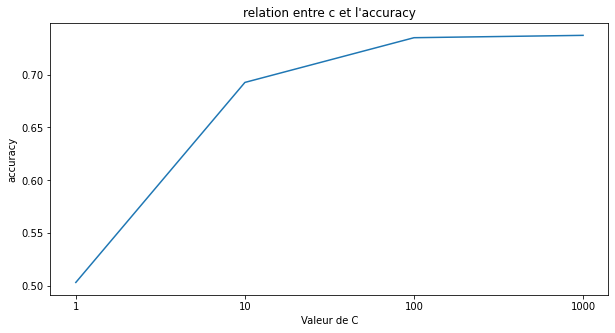

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.figure(figsize=(10,5))
plt.title("relation entre c et l'accuracy")
plt.xlabel("Valeur de C")
plt.ylabel("accuracy")
plt.plot(list(map(str, C_values)),accuracies)
plt.show()

In [ ]:
best_C = C_values[argmax(accuracies)]

clf = SVC(C = best_C)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'--> accuracy test = {acc}')

--> accuracy test = 0.7513935340022296


Do the same with different kernel values, and different decision functions:

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = []

for k in kernels:
  print(f'Training SVM with kernel={k}')
  #TODO
  clf = SVC(kernel = k,C=best_C)

  # Fit on sub-train set
  clf.fit(X_train,y_train)

  # Evaluate on val set
  pred = clf.predict(X_val)
  acc = accuracy_score(y_val,pred)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with kernel=linear
--> accuracy = 0.7149220489977728
Training SVM with kernel=poly
--> accuracy = 0.6391982182628062
Training SVM with kernel=rbf
--> accuracy = 0.7371937639198218
Training SVM with kernel=sigmoid
--> accuracy = 0.09131403118040089


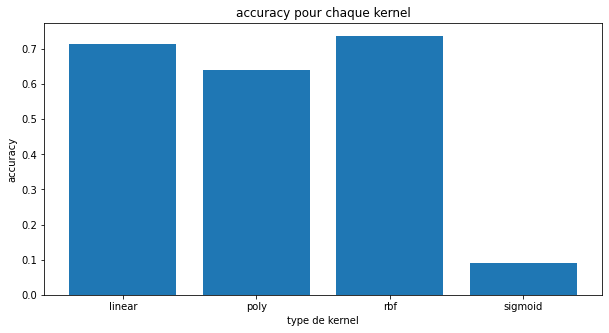

In [ ]:
#TODO plot the relation between kernel and the accuracy
plt.figure(figsize=(10,5))
plt.title("accuracy pour chaque kernel")
plt.xlabel("type de kernel")
plt.ylabel("accuracy")
plt.bar(list(map(str, kernels)),accuracies)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.multiclass import OneVsOneClassifier 

svcOneVsOne = OneVsOneClassifier(SVC(C=100,kernel='rbf'))
svcOneVsOne.fit(X_train, y_train)
pred = svcOneVsOne.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'--> accuracy OneVsOne = {acc}')


svcOneVsAll = OneVsRestClassifier(SVC(C=100,kernel='rbf'))
svcOneVsAll.fit(X_train, y_train)
pred = svcOneVsAll.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'--> accuracy OneVsAll = {acc}')

--> accuracy OneVsOne = 0.7547380156075808
--> accuracy OneVsAll = 0.7290969899665551


In [ ]:
iter_values = [100,200,500,1000]
accuracies = []

for i in iter_values:
  print(f'Training SVM with max_iter={i}')
  #TODO
  clf = SVC(max_iter = i,C=100)

  # Fit on sub-train set
  clf.fit(X_train,y_train)

  # Evaluate on val set
  pred = clf.predict(X_val)
  acc = accuracy_score(y_val,pred)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with max_iter=100


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--> accuracy = 0.6570155902004454
Training SVM with max_iter=200


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--> accuracy = 0.7238307349665924
Training SVM with max_iter=500


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--> accuracy = 0.732739420935412
Training SVM with max_iter=1000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--> accuracy = 0.734966592427617


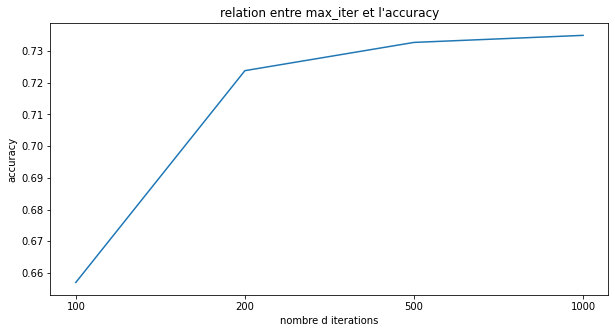

In [ ]:
#TODO plot the relation between max_iter and the accuracy
plt.figure(figsize=(10,5))
plt.title("relation entre max_iter et l'accuracy")
plt.xlabel("nombre d iterations")
plt.ylabel("accuracy")
plt.plot(list(map(str, iter_values)),accuracies)
plt.show()

In [ ]:
def grid_search(X,y,X_val,y_val,kernels=['linear','rbf', 'poly', 'sigmoid']):

    param = {'kernel': kernels,
            'C': [1, 10, 100, 1000],
            'max_iter': [200,500,1000],
            'shrinking':[True,False],
            'probability': [True, False],
             'gamma': ['auto', 'scale', 0.001, 0.1, 1.0],
             'coef0': [-1.0, 0.0, 1.0],
             'degree' : [1,3,5]
          }
                    

    out=list() 
    for kernel in param['kernel']:
      print("Calculating kernel : ", kernel)
      degree = "/"
      coef0 = "/"
      gamma="/"
      for C in param['C']:
        print("Calculating C : ", C)
        for max_iter in param['max_iter']:
          print("Calculating max_iter : ", max_iter)
          for shrinking in param['shrinking']:
            
            print("Calculating shrinking : ", shrinking)
            for probability in param['probability']:
              print("Calculating probability : ", probability)
              if kernel in ['rbf', 'poly', 'sigmoid']:
                for gamma in param['gamma']:
                  print("Calculating gamma : ", gamma)
                  if kernel in ['poly', 'sigmoid']:
                    for coef0 in param['coef0']:
                      print("Calculating coef0 : ", coef0)
                      if kernel == 'poly':
                        for degree in param['degree']:
                          print("Calculating degree : ", degree)
                          clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, shrinking=shrinking, probability=probability, max_iter=max_iter)
                          clf.fit(X,y)
                          pred = clf.predict(X_val)
                          acc = accuracy_score(y_val,pred)
                          out.append((str(kernel),str(C),str(max_iter),str(shrinking),str(probability),str(gamma),str(coef0),str(degree), str(round(acc, 2))))
                      else:
                        clf = SVC(C=C, kernel=kernel, gamma=gamma, coef0=coef0, shrinking=shrinking, probability=probability, max_iter=max_iter)
                        clf.fit(X,y)
                        pred = clf.predict(X_val)
                        acc = accuracy_score(y_val,pred)
                        out.append((str(kernel),str(C),str(max_iter),str(shrinking),str(probability),str(gamma),str(coef0),str(degree), str(round(acc, 2))))
                  else:
                    clf = SVC(C=C, kernel=kernel, gamma=gamma, shrinking=shrinking, probability=probability, max_iter=max_iter)
                    clf.fit(X,y)
                    pred = clf.predict(X_val)
                    acc = accuracy_score(y_val,pred)
                    out.append((str(kernel),str(C),str(max_iter),str(shrinking),str(probability),str(gamma),str(coef0),str(degree), str(round(acc, 2))))
              else:
                clf = SVC(C=C, kernel=kernel, shrinking=shrinking, probability=probability, max_iter=max_iter)
                clf.fit(X,y)
                pred = clf.predict(X_val)
                acc = accuracy_score(y_val,pred)
                out.append((str(kernel),str(C),str(max_iter),str(shrinking),str(probability),str(gamma),str(coef0),str(degree), str(round(acc, 2))))

    return out



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
all_comb = grid_search(X_train,y_train,X_val,y_val,kernels=['rbf'])


Calculating kernel :  rbf
Calculating C :  1
Calculating max_iter :  200
Calculating shrinking :  True
Calculating probability :  True
Calculating gamma :  auto
Calculating gamma :  scale
Calculating gamma :  0.001
Calculating gamma :  0.1
Calculating gamma :  1.0
Calculating probability :  False
Calculating gamma :  auto
Calculating gamma :  scale
Calculating gamma :  0.001
Calculating gamma :  0.1
Calculating gamma :  1.0
Calculating shrinking :  False
Calculating probability :  True
Calculating gamma :  auto
Calculating gamma :  scale
Calculating gamma :  0.001
Calculating gamma :  0.1
Calculating gamma :  1.0
Calculating probability :  False
Calculating gamma :  auto
Calculating gamma :  scale
Calculating gamma :  0.001
Calculating gamma :  0.1
Calculating gamma :  1.0
Calculating max_iter :  500
Calculating shrinking :  True
Calculating probability :  True
Calculating gamma :  auto
Calculating gamma :  scale
Calculating gamma :  0.001
Calculating gamma :  0.1
Calculating gamma :  

In [ ]:
import numpy as np  
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
tmp = np.asarray(all_comb)
data = {
    'kernel' : list(tmp[:,0]),
    'C' : list(tmp[:,1]),
    'max_iter' : list(tmp[:,2]),
    'shrinking' : list(tmp[:,3]),
    'probability' : list(tmp[:,4]),
    'gamma' : list(tmp[:,5]),
    'coef0' : list(tmp[:,6]),
    'degree' : list(tmp[:,7]),
    'accuracy' : list(tmp[:,8])
}

df = pd.DataFrame(data, columns = ['kernel','C', 'max_iter','shrinking','probability','gamma','coef0','degree','accuracy'])
df

,kernel,C,max_iter,shrinking,probability,gamma,coef0,degree,accuracy
0,rbf,1,200,True,True,auto,/,/,0.56
1,rbf,1,200,True,True,scale,/,/,0.54
2,rbf,1,200,True,True,0.001,/,/,0.56
3,rbf,1,200,True,True,0.1,/,/,0.37
4,rbf,1,200,True,True,1.0,/,/,0.07
5,rbf,1,200,True,False,auto,/,/,0.56
6,rbf,1,200,True,False,scale,/,/,0.54
7,rbf,1,200,True,False,0.001,/,/,0.56
8,rbf,1,200,True,False,0.1,/,/,0.37
9,rbf,1,200,True,False,1.0,/,/,0.07
